In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

from statsforecast.models import SeasonalNaive

In [7]:
path = 'https://drive.google.com/uc?export=download&id=' 
URL  = 'https://drive.google.com/file/d/1057_dPk6rIZgXVku8kmZjq3m8WQNkJZb/view?usp=sharing'
df = pd.read_csv(path+URL.split('/')[-2],usecols=[0,1,2,3,4,5,6,7],names=['Date','SERIE1','SERIE2','SERIE3','SERIE4','SERIE5','SERIE6','SERIE7'],
                 dtype={'Date':str,'SERIE1':float,'SERIE2':float,'SERIE3':float,'SERIE4':float,'SERIE5':float,'SERIE6':float,'SERIE7':float}) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,]
df.dropna(inplace=True)

In [8]:
df['Date'] = pd.to_datetime(df['Date'],format= '%d-%m-%Y %H:%M' ) #.dt.date https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html
df = df.set_index('Date')
df_5 = df.resample('5T').mean()
df_5.head()

,SERIE1,SERIE2,SERIE3,SERIE4,SERIE5,SERIE6,SERIE7
Date,,,,,,,
2010-01-01 00:00:00,5547.831152,4353.258496,4927.916309,1355.909058,1697.601026,3396.820703,920.982605
2010-01-01 00:05:00,5535.618164,4348.893457,4916.344433,1353.716626,1699.889233,3397.829590,918.181799
2010-01-01 00:10:00,5529.010351,4331.776856,4897.709473,1346.924121,1697.138647,3424.317334,916.371033
2010-01-01 00:15:00,5514.982032,4330.051758,4879.650098,1346.241382,1705.324194,3421.112500,916.161291
2010-01-01 00:20:00,5472.567285,4314.503906,4863.172266,1334.846802,1674.401562,3409.312451,914.513721


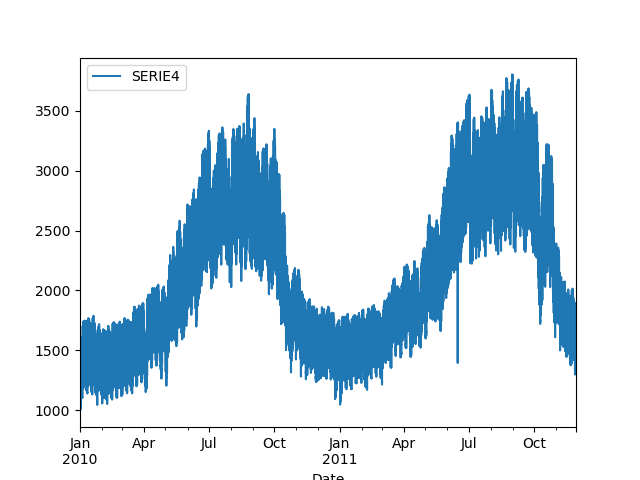

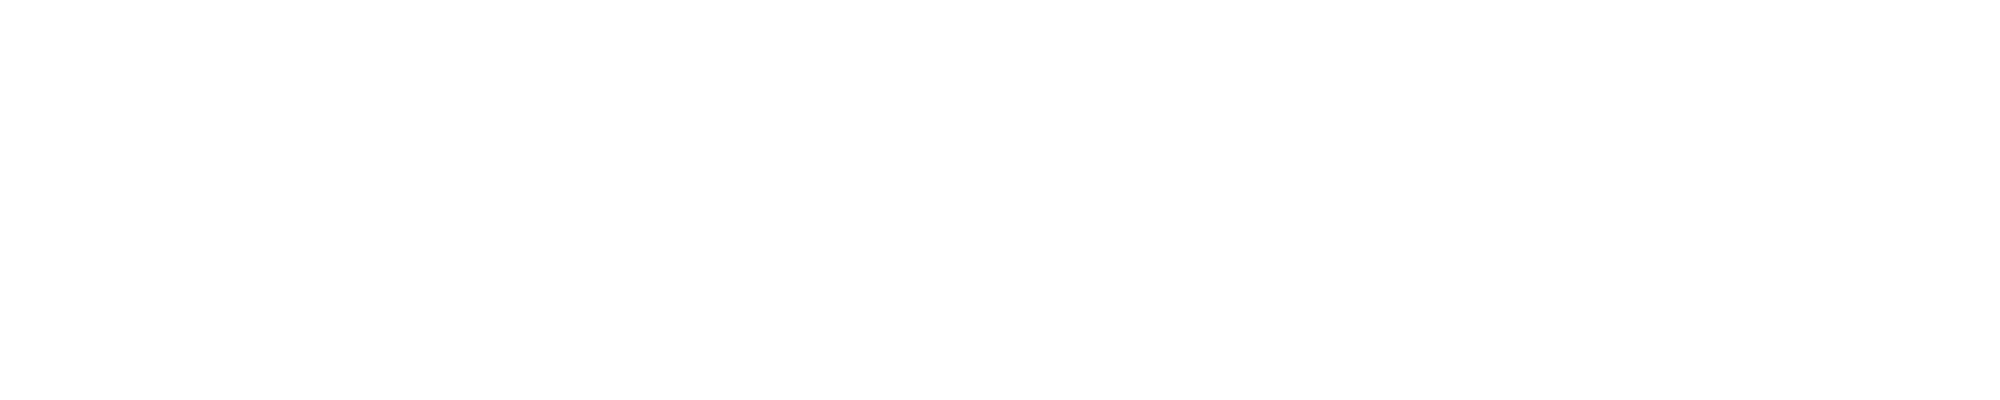

In [9]:
df_serie4 = df_5[['SERIE4']]
plt.figure(figsize=(20, 4))
#plt.savefig('series1.pdf', bbox_inches = 'tight')
df_serie4.plot()
plt.show()

In [34]:
model = SeasonalNaive(season_length = 288 * 7)
model = model.fit(y = df_serie4.SERIE4.values)
y_hat_dict = model.predict(h = 12 * 2 * 24)

# La serie pronosticada
pd.Series(y_hat_dict['mean'])

0      1672.356689
1      1668.348145
2      1667.355713
3      1666.464233
4      1669.918579
          ...     
571    1878.478394
572    1875.030273
573    1879.136108
574    1885.959106
575    1884.372314
Length: 576, dtype: float32

In [35]:
# Última fecha disponible
df_serie4.index[-1]

Timestamp('2011-11-28 15:50:00', freq='5T')

In [36]:
# Rango de fechas del pronóstico
idx = pd.date_range(
    start = df_serie4.index[-1], 
    periods = len(pd.Series(y_hat_dict['mean'])) + 1, freq='5T'
)[1:]
idx

DatetimeIndex(['2011-11-28 15:55:00', '2011-11-28 16:00:00',
               '2011-11-28 16:05:00', '2011-11-28 16:10:00',
               '2011-11-28 16:15:00', '2011-11-28 16:20:00',
               '2011-11-28 16:25:00', '2011-11-28 16:30:00',
               '2011-11-28 16:35:00', '2011-11-28 16:40:00',
               ...
               '2011-11-30 15:05:00', '2011-11-30 15:10:00',
               '2011-11-30 15:15:00', '2011-11-30 15:20:00',
               '2011-11-30 15:25:00', '2011-11-30 15:30:00',
               '2011-11-30 15:35:00', '2011-11-30 15:40:00',
               '2011-11-30 15:45:00', '2011-11-30 15:50:00'],
              dtype='datetime64[ns]', length=576, freq='5T')

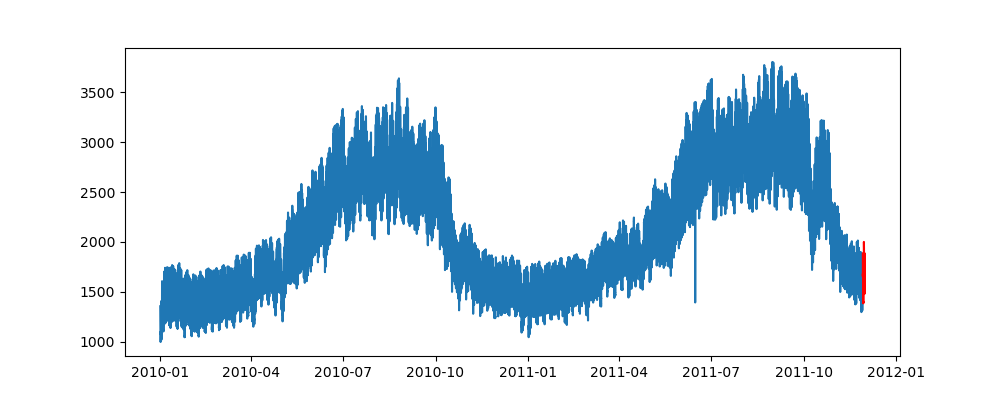

In [37]:
plt.figure(figsize=(10, 4))
#plt.savefig('series1.pdf', bbox_inches = 'tight')
plt.plot(df_serie4)
plt.plot(pd.DataFrame(y_hat_dict['mean'], index = idx), c = 'red')
plt.show()

In [ ]:
# [ ] Pendienting

In [8]:
from statsforecast.models import MSTL
from statsforecast.models import AutoARIMA
from statsforecast.models import AutoETS

In [9]:
# Predecir doce horas
values = df.loc[8758 - 24 * 2:8758 - 12, 'CENTRO'].values

In [10]:
mstl_model = AutoARIMA(season_length=24, num_cores = 8)
mstl_model = mstl_model.fit(y=values)

In [11]:
y_hat_dict = mstl_model.predict(h=12)
y_hat_dict

{'mean': array([1498.24574663, 1534.73557667, 1533.12619767, 1510.22240214,
        1475.73253131, 1435.25494109, 1392.00799481, 1347.83219737,
        1303.77069069, 1260.40549997, 1218.0522902 , 1176.87316041])}

In [12]:
df.loc[8758 - 12 + 1:, 'arim'] = y_hat_dict['mean']

C:\Users\user\AppData\Local\Temp\ipykernel_16584\1389718968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[8758 - 12 + 1:, 'arim'] = y_hat_dict['mean']


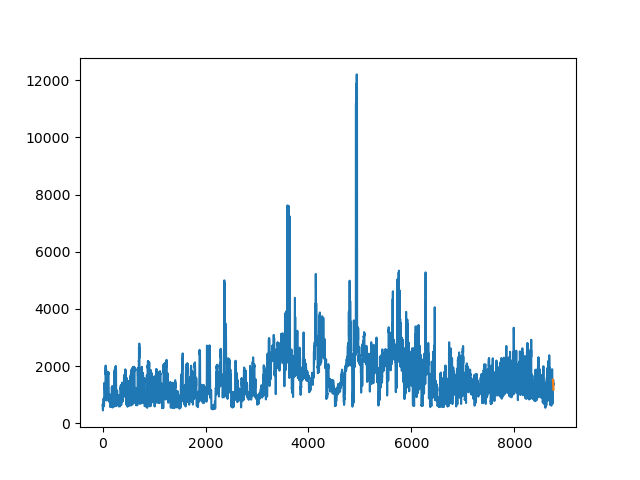

In [13]:
plt.figure()
plt.plot(df['CENTRO'])
# plt.plot(df['pred'])
plt.plot(df['arim'])
plt.show()